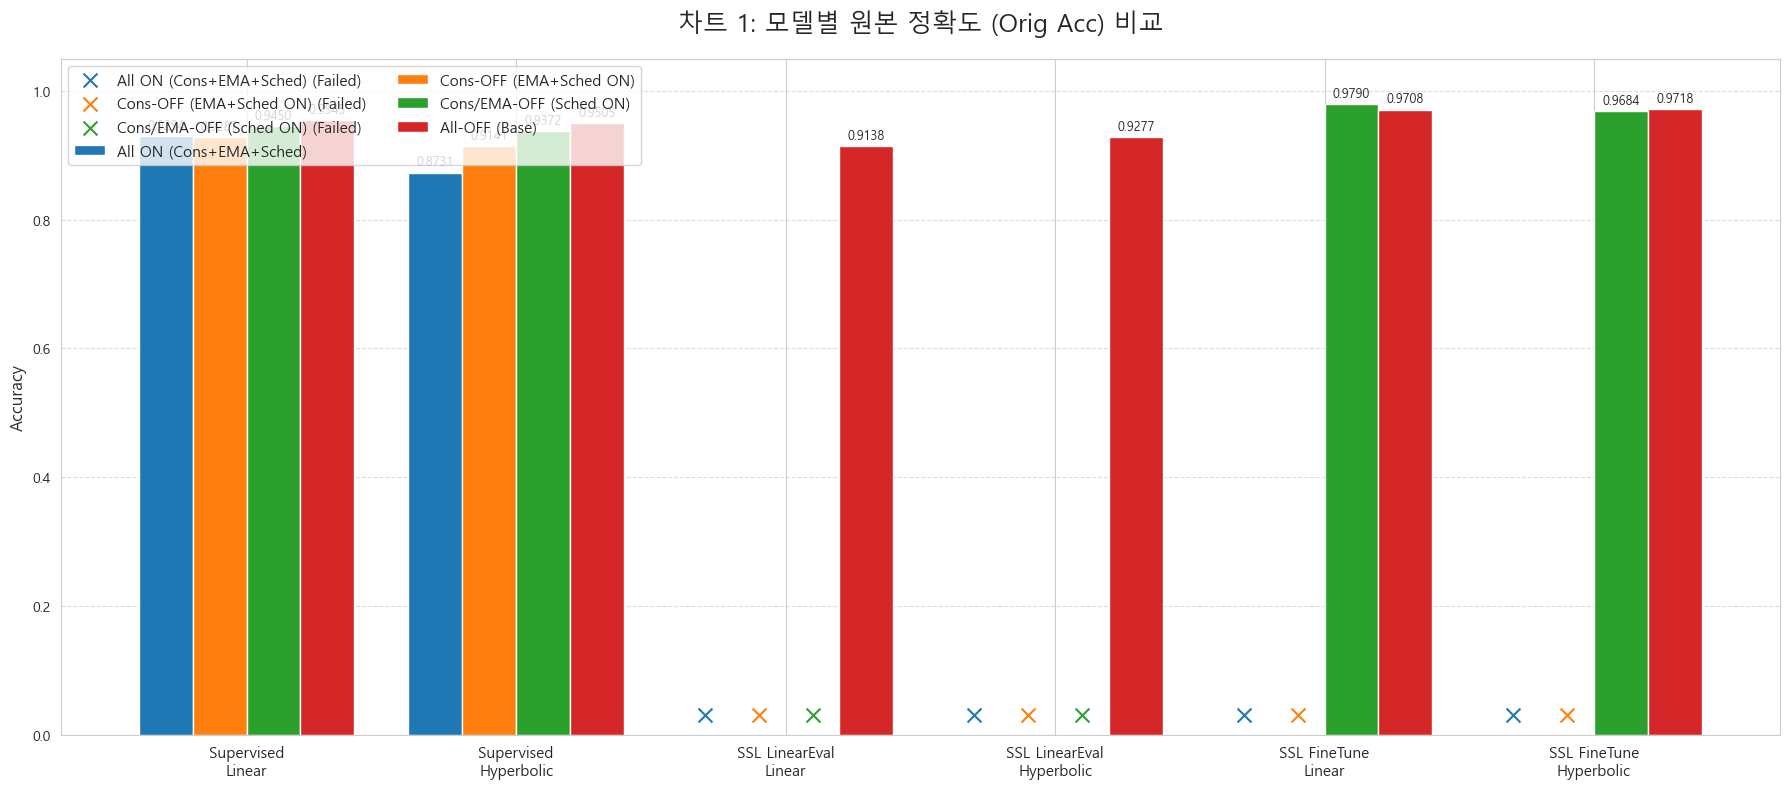

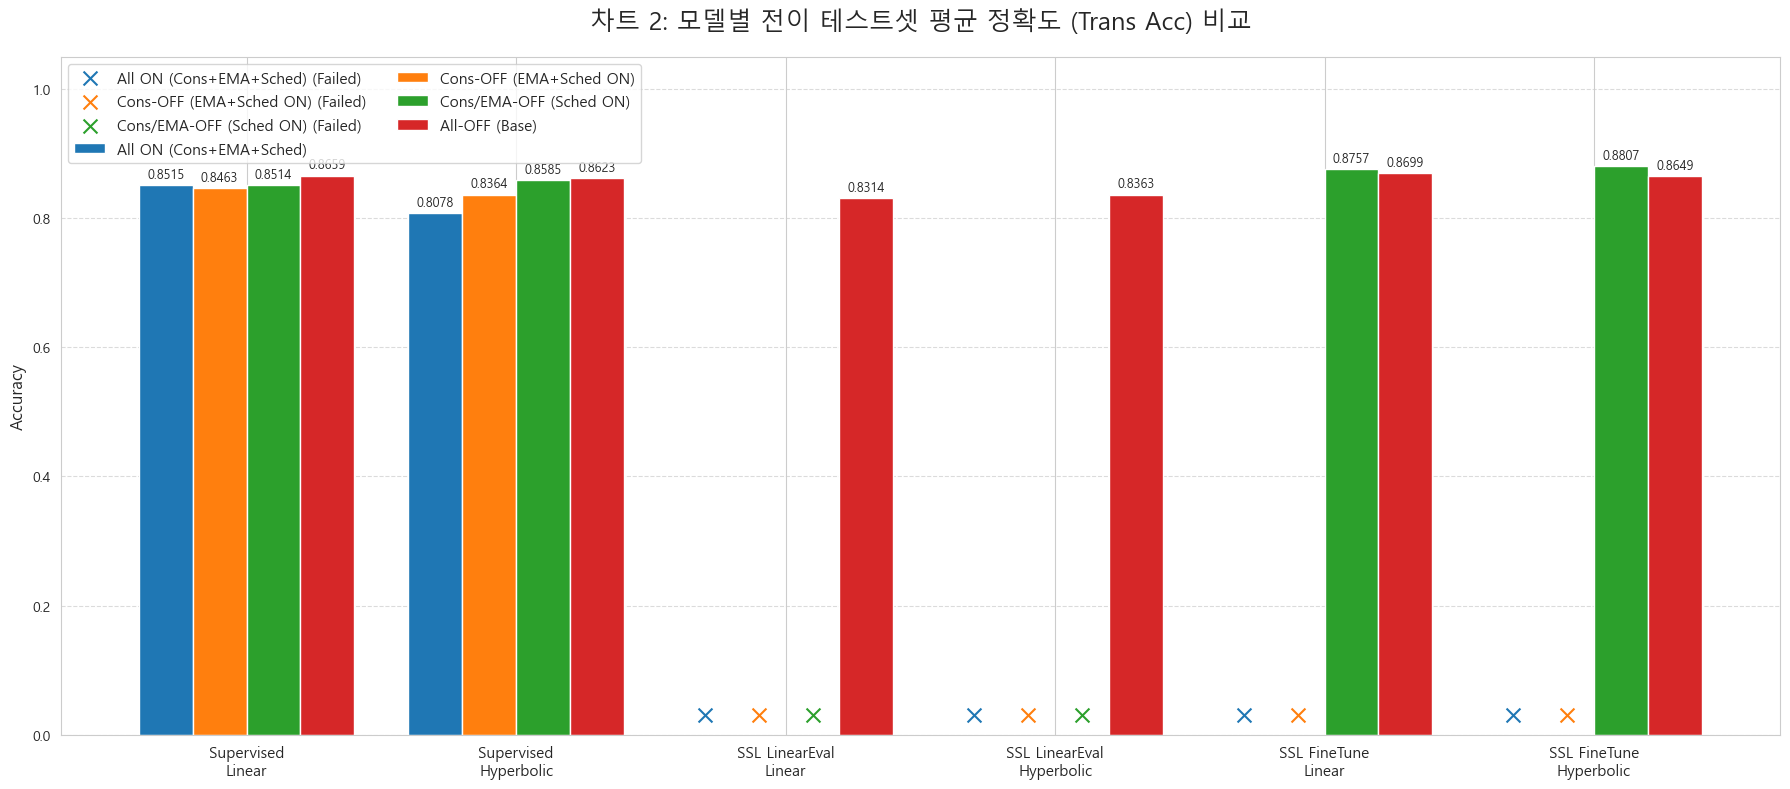

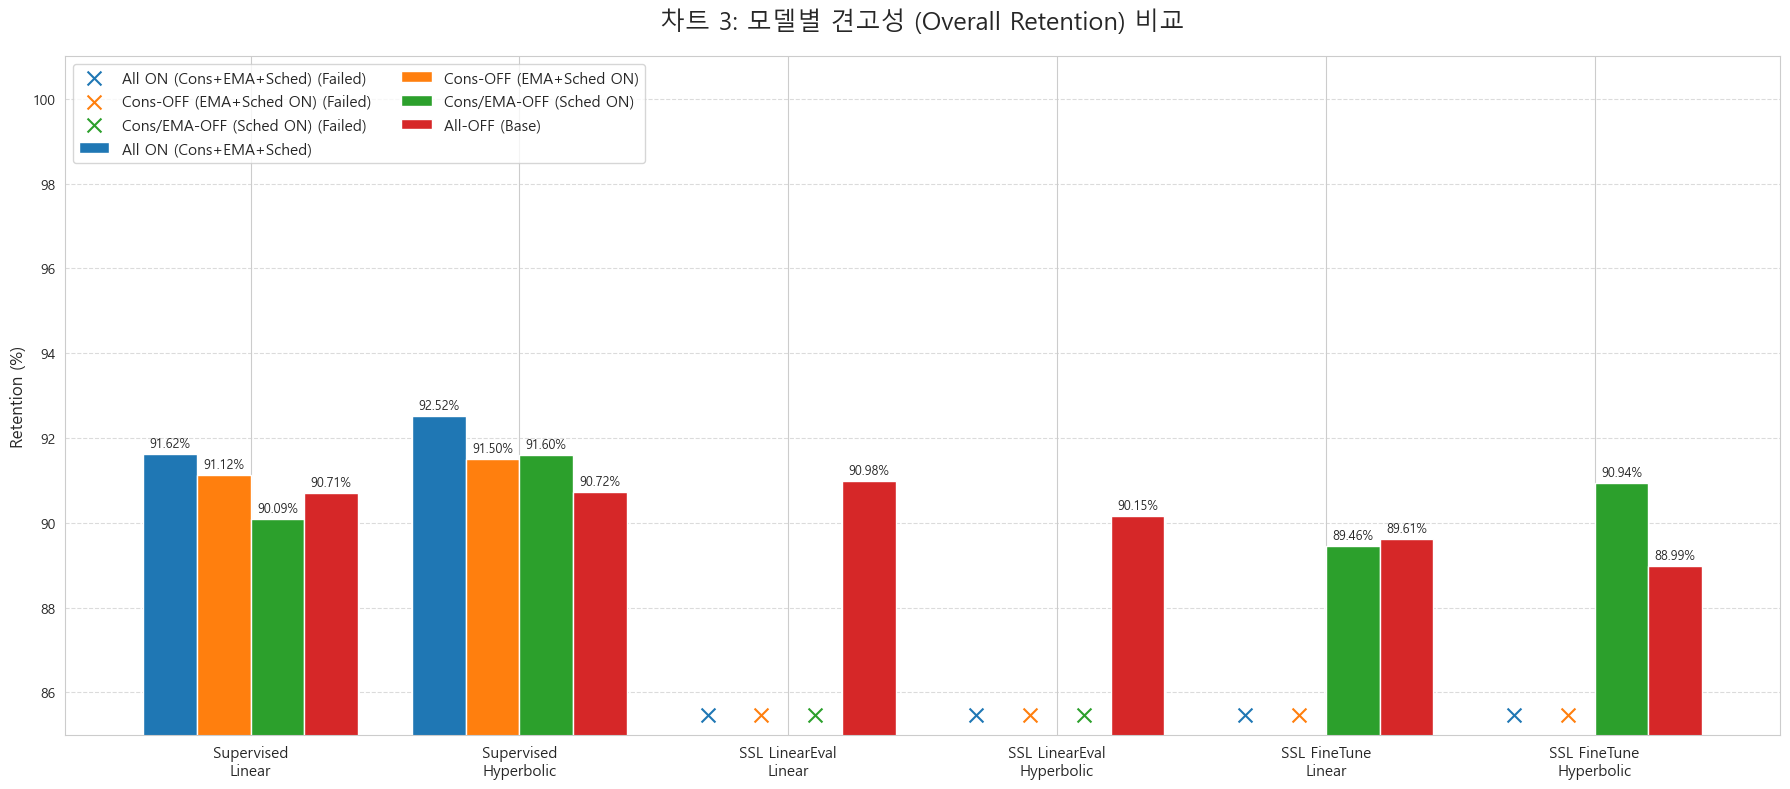

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# 1. 데이터 정의 (4가지 실험 로그 기반)
# ------------------------------------------------
# X축 레이블 (모델 6종)
labels = [
    'Supervised\nLinear', 'Supervised\nHyperbolic',
    'SSL LinearEval\nLinear', 'SSL LinearEval\nHyperbolic',
    'SSL FineTune\nLinear', 'SSL FineTune\nHyperbolic'
]

# 그룹 레이블 (실험 4종)
exp_versions = [
    'All ON (Cons+EMA+Sched)',
    'Cons-OFF (EMA+Sched ON)',
    'Cons/EMA-OFF (Sched ON)',
    'All-OFF (Base)'
]

# ------------------------------------------------
# "학습 실패" (EMA가 켠 SSL-FT, Sched가 켠 SSL-LEval)는 np.nan 처리
# ------------------------------------------------

# 데이터 1: 원본 정확도 (Orig Acc)
acc_data = {
    'All ON (Cons+EMA+Sched)':   [0.9294, 0.8731, np.nan, np.nan, np.nan, np.nan],
    'Cons-OFF (EMA+Sched ON)':   [0.9287, 0.9141, np.nan, np.nan, np.nan, np.nan],
    'Cons/EMA-OFF (Sched ON)':   [0.9450, 0.9372, np.nan, np.nan, 0.9790, 0.9684],
    'All-OFF (Base)':            [0.9545, 0.9505, 0.9138, 0.9277, 0.9708, 0.9718]
}

# 데이터 2: 전이 테스트셋 평균 정확도 (Trans Acc)
trans_acc_data = {
    'All ON (Cons+EMA+Sched)':   [0.8515, 0.8078, np.nan, np.nan, np.nan, np.nan],
    'Cons-OFF (EMA+Sched ON)':   [0.8463, 0.8364, np.nan, np.nan, np.nan, np.nan],
    'Cons/EMA-OFF (Sched ON)':   [0.8514, 0.8585, np.nan, np.nan, 0.8757, 0.8807],
    'All-OFF (Base)':            [0.8659, 0.8623, 0.8314, 0.8363, 0.8699, 0.8649]
}

# 데이터 3: 견고성 (Overall Retention)
ret_data = {
    'All ON (Cons+EMA+Sched)':   [91.62, 92.52, np.nan, np.nan, np.nan, np.nan],
    'Cons-OFF (EMA+Sched ON)':   [91.12, 91.50, np.nan, np.nan, np.nan, np.nan],
    'Cons/EMA-OFF (Sched ON)':   [90.09, 91.60, np.nan, np.nan, 89.46, 90.94],
    'All-OFF (Base)':            [90.71, 90.72, 90.98, 90.15, 89.61, 88.99]
}


# 2. 플롯 생성 헬퍼 함수
# ------------------------------------------------
def plot_grouped_bar(data_dict, title, ylabel, y_range, format_str):
    fig, ax = plt.subplots(figsize=(18, 8))
    
    x = np.arange(len(labels))
    width = 0.20
    offsets = [-1.5 * width, -0.5 * width, 0.5 * width, 1.5 * width]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    ax.set_title(title, fontsize=18, pad=20)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_ylim(y_range)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # 실패 마커를 위한 y위치 (y_range 기준)
    fail_marker_y = y_range[0] + (y_range[1] - y_range[0]) * 0.03

    for i, (version, data) in enumerate(data_dict.items()):
        # np.nan이 아닌 값만 필터링
        valid_indices = ~np.isnan(data)
        valid_x = x[valid_indices] + offsets[i]
        valid_data = np.array(data)[valid_indices]
        
        rects = ax.bar(valid_x, valid_data, width, label=version, color=colors[i])
        ax.bar_label(rects, padding=3, fmt=format_str, fontsize=9)
        
        # "실패"한 바(bar) 위치에 'X' 표시
        nan_indices = np.isnan(data)
        nan_x = x[nan_indices] + offsets[i]
        if len(nan_x) > 0:
            ax.scatter(nan_x, [fail_marker_y] * len(nan_x), marker='x', 
                       color=colors[i], s=100, zorder=10, label=f'{version} (Failed)')

    # 범례 정렬
    handles, leg_labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(leg_labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), 
              loc='upper left', ncol=2, fontsize=11)
    
    plt.tight_layout()
    plt.show()

# 3. 그래프 그리기
# ------------------------------------------------

# 그래프 1: 원본 정확도
plot_grouped_bar(
    data_dict=acc_data,
    title='차트 1: 모델별 원본 정확도 (Orig Acc) 비교',
    ylabel='Accuracy',
    y_range=(0, 1.05),
    format_str='%.4f'
)

# 그래프 2: 전이 테스트셋 정확도
plot_grouped_bar(
    data_dict=trans_acc_data,
    title='차트 2: 모델별 전이 테스트셋 평균 정확도 (Trans Acc) 비교',
    ylabel='Accuracy',
    y_range=(0, 1.05),
    format_str='%.4f'
)

# 그래프 3: 견고성 (Retention)
plot_grouped_bar(
    data_dict=ret_data,
    title='차트 3: 모델별 견고성 (Overall Retention) 비교',
    ylabel='Retention (%)',
    y_range=(85, 101), # 85% ~ 101% 범위로 확대
    format_str='%.2f%%'
)